In [1]:
!pip install -q pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 74.8 MB/s eta 0:00:00
   ━━━

In [2]:
import time
import numpy as np
import pandas as pd

from pycaret.datasets import get_data

In [3]:
dataset = get_data('airquality')
target = "CO(GT)"

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [4]:
import pandas as pd
dataset['index'] = pd.to_datetime(dataset['Date'] + " " + dataset['Time'])
dataset.drop(['Date', 'Time'], axis=1, inplace=True)
dataset.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,index
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004-03-10 22:00:00


In [5]:
dataset[dataset[target] == -200].head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,index
10,-200.0,1011,14,1.3,527,21,1818,34,1197,445,10.1,60.5,0.7465,2004-03-11 04:00:00
34,-200.0,831,10,1.1,506,21,1893,32,1134,384,6.1,65.9,0.6248,2004-03-12 04:00:00
39,-200.0,1545,-200,22.1,1353,-200,767,-200,2058,1588,9.2,56.2,0.6561,2004-03-12 09:00:00
58,-200.0,1147,56,6.2,821,109,1132,83,1412,992,7.0,71.1,0.7158,2004-03-13 04:00:00
82,-200.0,1130,56,5.2,773,70,1130,82,1452,1051,12.1,61.1,0.8603,2004-03-14 04:00:00


In [6]:
dataset.replace(-200, np.nan, inplace=True)
dataset[dataset[target] == -200].head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,index


In [7]:
figure_kwargs = {
    # "renderer": "notebook",
    "renderer": "png",
    "width": 1000,
    "height": 600,
}

folds = 3
fh = 48

In [8]:
from pycaret.time_series import *
ts_exp = TSForecastingExperiment()
ts_exp.setup(dataset, target=target, index="index", fh=fh,
            numeric_imputation_target="ffill",
            numeric_imputation_exogenous="ffill",
            fig_kwargs=figure_kwargs)

,Description,Value
0,session_id,3320
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(9357, 13)"
5,Transformed data shape,"(9357, 13)"
6,Transformed train set shape,"(9309, 13)"
7,Transformed test set shape,"(48, 13)"
8,Rows with missing values,91.2%
9,Fold Generator,ExpandingWindowSplitter


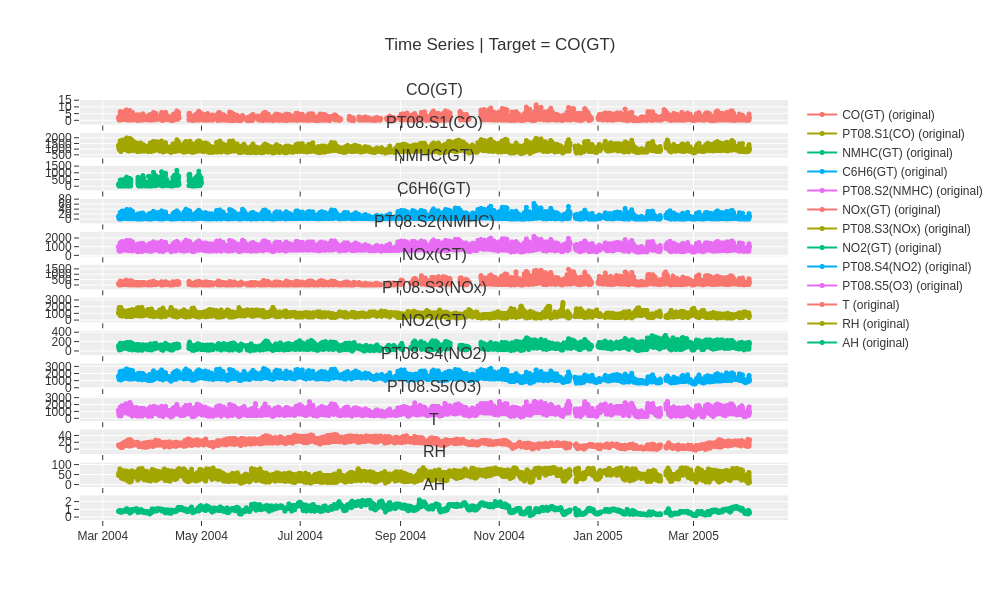

In [9]:
ts_exp.plot_model()

In [10]:
ts_exp.plot_model(
    plot="ts",
    fig_kwargs={
        'height': 1200,
        "resampler_kwargs": {
            "default_n_shown_samples": 1500,
            "show_dash": {"mode": "inline", "port": 8055},
        },
    },
    display_format="plotly-dash"
)

<IPython.core.display.Javascript object>

In [11]:
excluded = ["NMHC(GT)"]

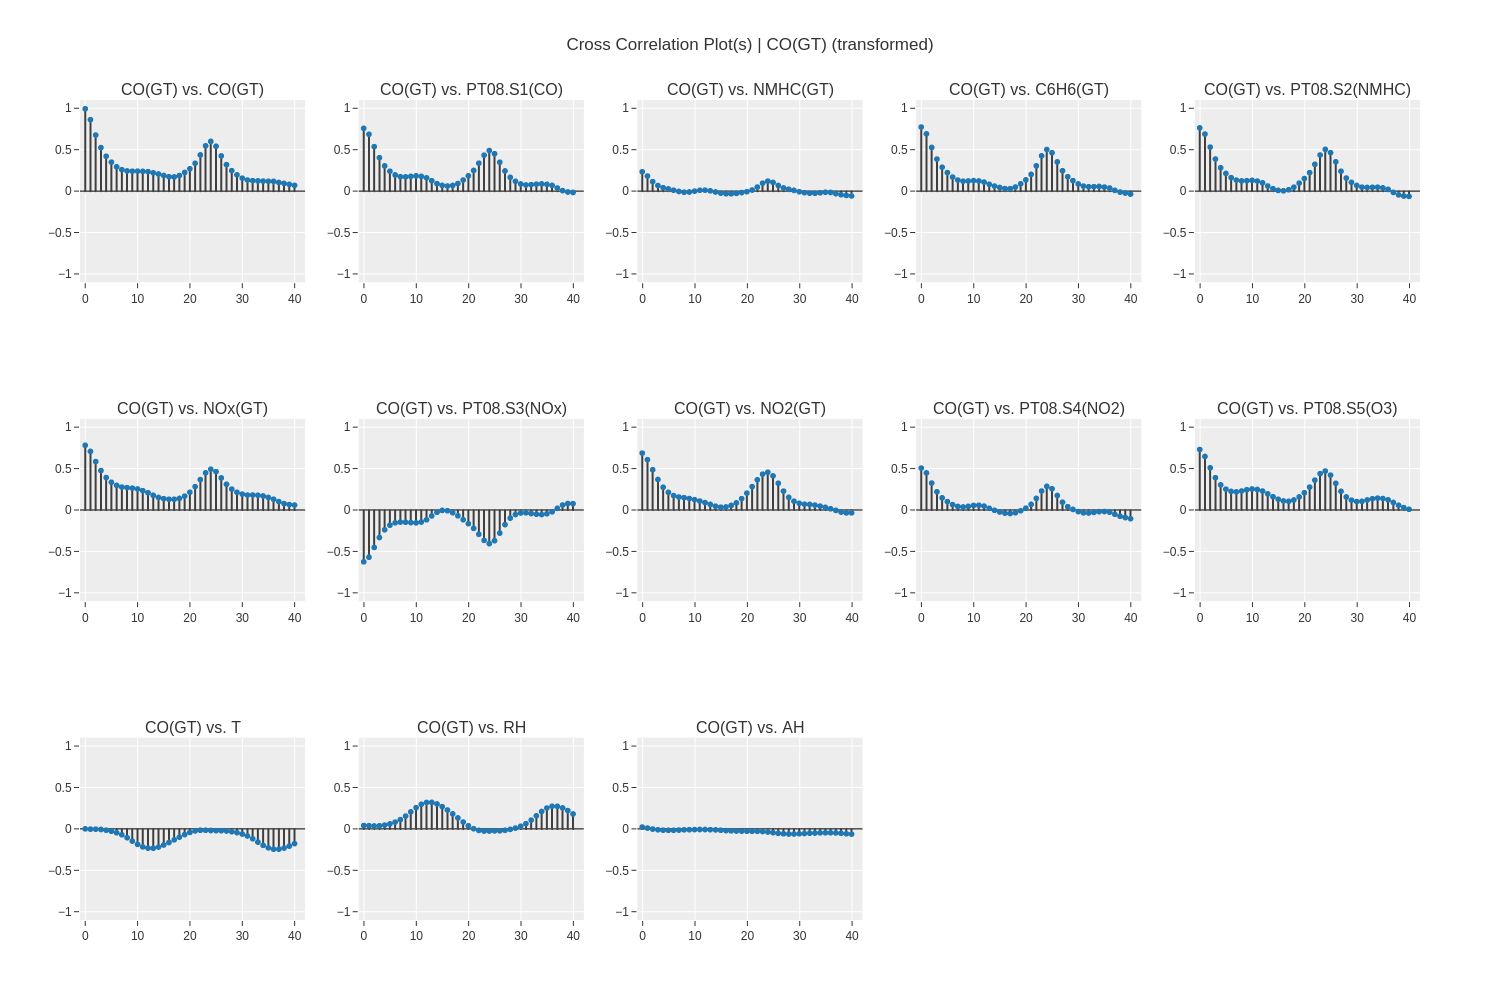

In [12]:
ts_exp.plot_model(plot="ccf", fig_kwargs={"height": 1000, "width": 1500})

In [13]:
excluded.append("AH")

In [14]:
dataset.drop(columns=excluded, inplace=True)
dataset.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,index
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,2004-03-10 18:00:00
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,2004-03-10 19:00:00
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,2004-03-10 20:00:00
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,2004-03-10 21:00:00
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,2004-03-10 22:00:00


In [15]:
data_non_exo = dataset.copy()
data_non_exo.set_index("index", inplace=True)
data_non_exo = data_non_exo[target]

ts_exp_non_exo = TSForecastingExperiment()
ts_exp_non_exo.setup(
    data=data_non_exo, fh=fh,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs=figure_kwargs)

,Description,Value
0,session_id,7630
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(9357, 1)"
5,Transformed data shape,"(9357, 1)"
6,Transformed train set shape,"(9309, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,18.0%
9,Fold Generator,ExpandingWindowSplitter


In [16]:
non_exo_model = ts_exp_non_exo.create_model("arima", order=(0,1,0), seasonal_order=(0,1,0,24))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2005-03-27 14:00,1.2101,1.1315,1.0340,1.4835,0.5751,0.9044,-1.3625
1,2005-03-29 14:00,2.2086,1.6277,1.8839,2.1316,1.5146,0.7456,-2.8068
2,2005-03-31 14:00,1.1332,0.8553,0.9652,1.1183,1.1796,1.2402,-5.1529
Mean,NaT,1.5173,1.2048,1.2944,1.5778,1.0898,0.9634,-3.1074
SD,NaT,0.4899,0.3196,0.4178,0.4190,0.3888,0.2062,1.5620


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

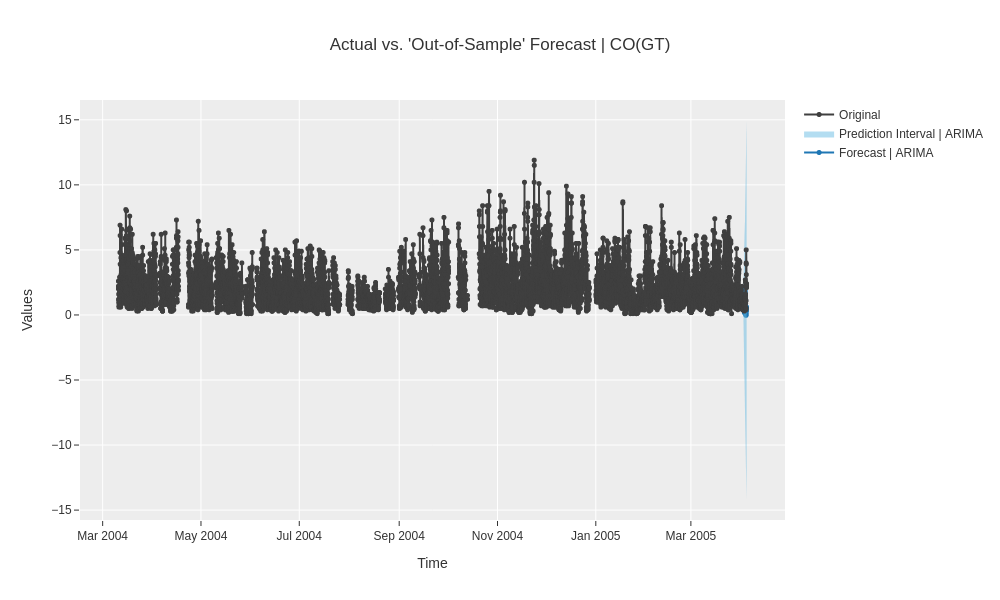

In [17]:
ts_exp_non_exo.plot_model(non_exo_model)

In [18]:
ts_exp_exo = TSForecastingExperiment()
ts_exp_exo.setup(
    data=dataset, target=target, index="index", fh=fh,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs=figure_kwargs)

,Description,Value
0,session_id,8342
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(9357, 11)"
5,Transformed data shape,"(9357, 11)"
6,Transformed train set shape,"(9309, 11)"
7,Transformed test set shape,"(48, 11)"
8,Rows with missing values,25.8%
9,Fold Generator,ExpandingWindowSplitter


In [19]:
exo_model = ts_exp_exo.create_model("arima", order=(0,1,0), seasonal_order=(0,1,0,24))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2005-03-27 14:00,0.1473,0.1281,0.1259,0.1680,0.0825,0.0824,0.9697
1,2005-03-29 14:00,0.1931,0.1628,0.1647,0.2132,0.1043,0.1112,0.9619
2,2005-03-31 14:00,0.3009,0.2474,0.2563,0.3235,0.2767,0.3375,0.4852
Mean,NaT,0.2138,0.1794,0.1823,0.2349,0.1545,0.1770,0.8056
SD,NaT,0.0644,0.0501,0.0547,0.0653,0.0869,0.1141,0.2266


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

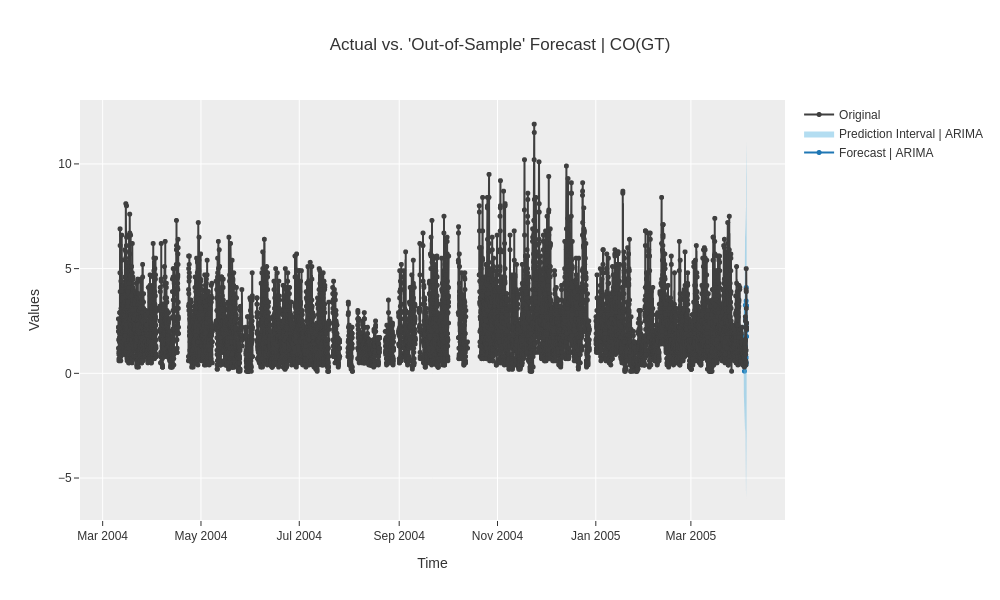

In [20]:
ts_exp_exo.plot_model(exo_model)

In [21]:
ts_exp_exo_trimmed = TSForecastingExperiment()
retain = [target, "index", 'NOx(GT)', "PT08.S3(NOx)", "RH"]
data_exo_trimmed = dataset[retain]
ts_exp_exo_trimmed.setup(
    data=data_exo_trimmed, target=target, index="index", fh=fh,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs=figure_kwargs)

,Description,Value
0,session_id,7568
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(9357, 4)"
5,Transformed data shape,"(9357, 4)"
6,Transformed train set shape,"(9309, 4)"
7,Transformed test set shape,"(48, 4)"
8,Rows with missing values,25.8%
9,Fold Generator,ExpandingWindowSplitter


In [22]:
model_exo_trimmed = ts_exp_exo_trimmed.create_model("arima", order=(0,1,0), seasonal_order=(0,1,0,24))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2005-03-27 14:00,0.2174,0.1891,0.1857,0.2479,0.1339,0.1230,0.9340
1,2005-03-29 14:00,0.2644,0.2209,0.2255,0.2893,0.1358,0.1524,0.9299
2,2005-03-31 14:00,0.2366,0.1972,0.2015,0.2579,0.2503,0.3316,0.6729
Mean,NaT,0.2395,0.2024,0.2043,0.2650,0.1733,0.2023,0.8456
SD,NaT,0.0193,0.0135,0.0164,0.0177,0.0544,0.0922,0.1221


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

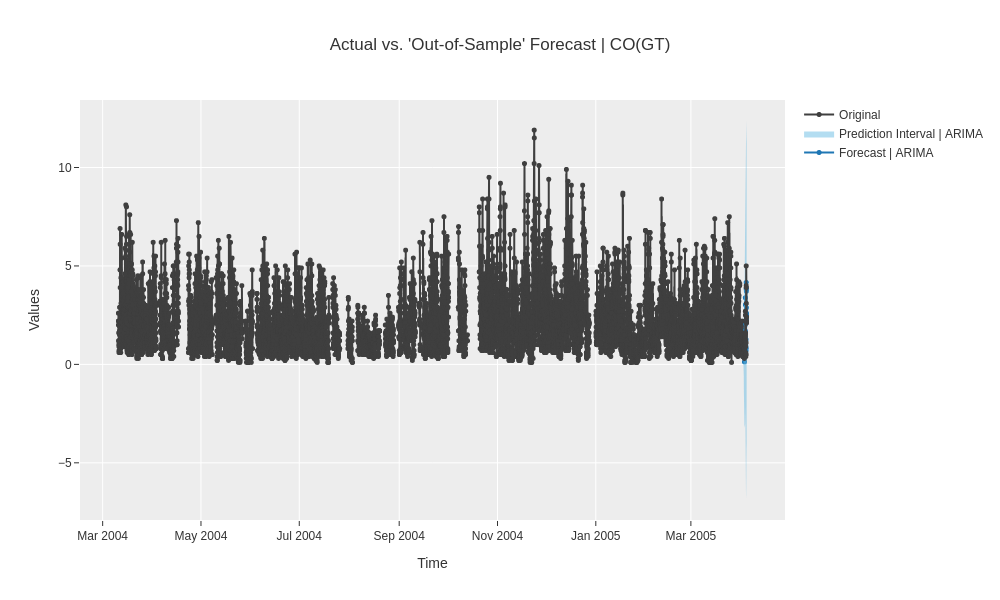

In [23]:
ts_exp_exo_trimmed.plot_model(model_exo_trimmed)

In [24]:
exogenous_variables = ["NOx(GT)", "PT08.S3(NOx)", "RH"]
data = dataset[["index"] + exogenous_variables]
data.head()

,index,NOx(GT),PT08.S3(NOx),RH
0,2004-03-10 18:00:00,166.0,1056.0,48.9
1,2004-03-10 19:00:00,103.0,1174.0,47.7
2,2004-03-10 20:00:00,131.0,1140.0,54.0
3,2004-03-10 21:00:00,172.0,1092.0,60.0
4,2004-03-10 22:00:00,131.0,1205.0,59.6


In [25]:
exogenous__experiments = []
exogenous_models = []

for exo_var in exogenous_variables:
    exo_exp = TSForecastingExperiment()
    exo_exp.setup(
        data=data[["index", exo_var]], target=exo_var, index="index", fh=48,
        numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
        fig_kwargs=figure_kwargs)

    exo_var_model = exo_exp.compare_models(
        sort="mase", include=["arima", "ets", "exp_smooth", "theta", "lightgbm_cds_dt",]
    )
    final_model = exo_exp.finalize_model(exo_var_model)

    exogenous__experiments.append(exo_exp)
    exogenous_models.append(final_model)

,Description,Value
0,session_id,3438
1,Target,NOx(GT)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(9357, 1)"
5,Transformed data shape,"(9357, 1)"
6,Transformed train set shape,"(9309, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,17.5%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,0.8610,0.7894,86.7546,131.8079,0.4149,0.3424,-1.1678,7.2233
theta,Theta Forecaster,0.9039,0.6970,91.1275,116.4429,0.4517,0.4705,-0.0454,0.1800
exp_smooth,Exponential Smoothing,1.1326,0.8824,114.1280,147.3610,0.5586,0.4647,-0.8015,1.4633
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.2177,0.8890,122.6904,148.4276,0.7855,0.4991,-2.0102,3.2800
ets,ETS,1.8700,1.3701,188.4919,228.8635,0.9945,0.8749,-2.7325,6.4467


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Description,Value
0,session_id,1050
1,Target,PT08.S3(NOx)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(9357, 1)"
5,Transformed data shape,"(9357, 1)"
6,Transformed train set shape,"(9309, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,3.9%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,0.7628,0.6520,119.1559,147.7406,0.1649,0.1640,0.1057,0.1033
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.7702,0.6372,120.1980,144.2622,0.1466,0.1590,-0.0499,4.4400
arima,ARIMA,0.7759,0.6886,121.1164,155.9659,0.1568,0.1657,-0.0584,5.2200
ets,ETS,0.8987,0.7629,140.3534,172.8306,0.1868,0.1844,-0.2107,4.0867
exp_smooth,Exponential Smoothing,1.1501,0.9849,179.6229,223.1679,0.2377,0.2130,-1.2078,1.0567


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Description,Value
0,session_id,1584
1,Target,RH
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(9357, 1)"
5,Transformed data shape,"(9357, 1)"
6,Transformed train set shape,"(9309, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,3.9%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.1990,1.0486,11.0836,13.5879,0.2862,0.2304,-0.9502,2.5633
exp_smooth,Exponential Smoothing,1.4890,1.1904,13.7510,15.4140,0.3037,0.2478,-0.4248,1.5933
arima,ARIMA,1.5657,1.3693,14.4696,17.7412,0.3539,0.2739,-2.1191,2.9833
theta,Theta Forecaster,1.9102,1.4902,17.6420,19.2958,0.3713,0.2986,-1.2629,0.1833
ets,ETS,3.4500,2.6553,31.8616,34.3798,0.6294,0.4584,-6.1709,5.2833


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [27]:
future_exogenous_values = [
    exo_exp.predict_model(exo_var_model)
    for exo_exp, exo_var_model in zip(exogenous__experiments, exogenous_models)
]
future_exogenous_values = pd.concat(future_exogenous_values, axis=1)
future_exogenous_values.columns = exogenous_variables
future_exogenous_values.head()

,NOx(GT),PT08.S3(NOx),RH
2005-04-04 15:00,262.1091,656.1044,14.5065
2005-04-04 16:00,297.1918,638.6659,15.6333
2005-04-04 17:00,325.5872,596.7227,17.5673
2005-04-04 18:00,259.7444,556.0672,22.7364
2005-04-04 19:00,425.2039,534.2108,28.3385


In [28]:
prediction = ts_exp_exo_trimmed.predict_model(model_exo_trimmed, X=future_exogenous_values)
prediction.head()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,1.1797,0.9488,1.0028,1.2386,1.1094,0.6066,-0.5343


,y_pred
2005-04-02 15:00,2.1342
2005-04-02 16:00,2.3867
2005-04-02 17:00,2.6278
2005-04-02 18:00,2.2715
2005-04-02 19:00,3.6522


<Axes: >

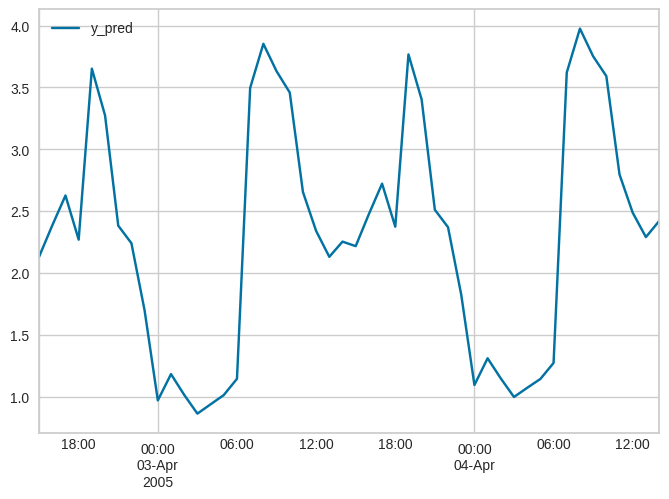

In [29]:
prediction.plot()